## Problem Statement - 1

Recover BST - Two Nodes are Swapped, Correct it

### Definition

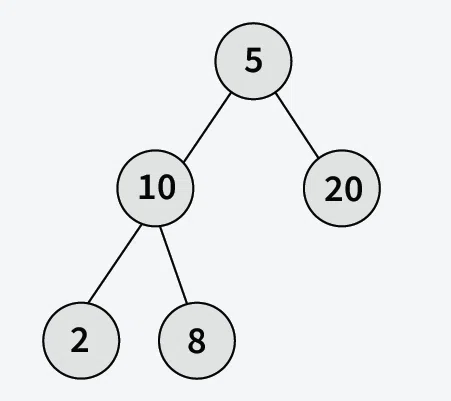

The nodes 10 and 5 were swapped.

Example 2:


The nodes 20 and 8 were swapped.

## Approach

Approach 1: Naive Approach: Inorder Traversal and Sorting - O(n * log n) Time and O(n) Space

Approach 2: Using One Traversal  

## Code - Approach 1

In [1]:
# Python program to correct the BST by replacing
# node values with sorted values

class Node:
    def __init__(self, x):
        self.data = x
        self.left = None
        self.right = None


# Function to store the inorder
# traversal of the tree in an array
def findInorder(curr, inorder):
    if curr is None:
        return

    # Recursively store left subtree
    findInorder(curr.left, inorder)

    # Store the current node's data
    inorder.append(curr.data)

    # Recursively store right subtree
    findInorder(curr.right, inorder)


# Recursive function to correct the BST by replacing
# node values with sorted values
def correctBSTUtil(root, inorder, index):
    if root is None:
        return

    # Recursively fill the left subtree
    correctBSTUtil(root.left, inorder, index)

    # Replace the current node's data with
    # the correct value from the sorted array
    root.data = inorder[index[0]]
    index[0] += 1

    # Recursively fill the right subtree
    correctBSTUtil(root.right, inorder, index)

# Function to fix the given BST where two nodes are swapped.
def correctBST(root):
    # Array to store the inorder traversal of the tree
    inorder = []
    findInorder(root, inorder)

    # Sort the array to get the correct order of
    # elements in a BST
    inorder.sort()

    index = [0]
    correctBSTUtil(root, inorder, index)


# Print tree as level order
def printLevelOrder(root):
    if root is None:
        print("N", end=" ")
        return

    queue = [root]
    nonNull = 1

    while queue and nonNull > 0:
        curr = queue.pop(0)

        if curr is None:
            print("N", end=" ")
            continue
        nonNull -= 1

        print(curr.data, end=" ")
        queue.append(curr.left)
        queue.append(curr.right)
        if curr.left:
            nonNull += 1
        if curr.right:
            nonNull += 1


In [2]:
if __name__ == "__main__":
    # Constructing the tree with swapped nodes
    #       6
    #     /  \
    #    10   2
    #   / \  / \
    #  1  3 7  12
    # Here, 10 and 2 are swapped

    root = Node(6)
    root.left = Node(10)
    root.right = Node(2)
    root.left.left = Node(1)
    root.left.right = Node(3)
    root.right.right = Node(12)
    root.right.left = Node(7)

    correctBST(root)
    printLevelOrder(root)

6 2 10 1 3 7 12 

## Complexity study

Time Complexity: O(nlogn)
Space: O(n)

## Code - Approach 2

Since Inorder traversal of BST is always a sorted array, the problem can be reduced to a problem where two elements of a sorted array are swapped. We do Inorder traversal of the tree and whenever we find nodes out of sorted order, we store those nodes.

Two cases arise:

The two are not adjacent. In this case we find two violations.
The two swapped nodes are adjacent in Inorder. We find only one violation in this case.

In [7]:
# Python code for correcting a BST where two nodes are swapped,
# Using recursion

class Node:
    def __init__(self, val):
        self.data = val
        self.left = None
        self.right = None

# Recursive Function for inorder traversal to find out 
# the two swapped nodes.
def correctBSTUtil(root, first, middle, last, prev):
    if root is None:
        return

    # Recur for the left subtree
    correctBSTUtil(root.left, first, middle, last, prev)

    # If this node is smaller than the previous node, 
    # it's violating the BST rule.
    if prev[0] and root.data < prev[0].data:

        # If this is the first violation, mark these 
        # two nodes as 'first' and 'middle'
        if not first[0]:
            first[0] = prev[0]
            middle[0] = root

        # If this is the second violation, 
        # mark this node as last
        else:
            last[0] = root

    # Mark this node as previous
    prev[0] = root

    # Recur for the right subtree
    correctBSTUtil(root.right, first, middle, last, prev)

# Function to fix the given BST, where two nodes are swapped.
def correctBST(root):
  
    # Initialize pointers needed for correctBSTUtil()
    first, middle, last, prev = [None], [None], [None], [None]

    # Set the pointers to find out two nodes
    correctBSTUtil(root, first, middle, last, prev)

    # Fix (or correct) the tree
    if first[0] and last[0]:
        first[0].data, last[0].data = last[0].data, first[0].data
    elif first[0] and middle[0]:
        first[0].data, middle[0].data = middle[0].data, first[0].data

# Print tree as level order
def printLevelOrder(root):
    if not root:
        print("N", end=" ")
        return

    queue = [root]
    nonNull = 1

    while queue and nonNull > 0:
        curr = queue.pop(0)

        if curr is None:
            print("N", end=" ")
            continue
        nonNull -= 1

        print(curr.data, end=" ")
        queue.append(curr.left)
        queue.append(curr.right)
        if curr.left:
            nonNull += 1
        if curr.right:
            nonNull += 1

In [8]:
if __name__ == "__main__":
    # Constructing the tree with swapped nodes
    #       6
    #     /  \
    #    10   2
    #   / \  / \
    #  1  3 7  12
    # Here, 10 and 2 are swapped

    root = Node(6)
    root.left = Node(10)
    root.right = Node(2)
    root.left.left = Node(1)
    root.left.right = Node(3)
    root.right.right = Node(12)
    root.right.left = Node(7)

    correctBST(root)
    printLevelOrder(root)


6 2 10 1 3 7 12 

## Complexity - Approach 2

Time Complexity: O(n)

Auxiliary Space: O(n)

## Problem Statement 2

Lowest Common Ancestor in a Binary Tree


Given the root of a Binary Tree with all unique values and two node values n1 and n2, the task is to find the lowest common ancestor of the given two nodes. The Lowest Common Ancestor (or LCA) is the lowest node in the tree that has both n1 and n2 as descendants. In other words, the LCA of n1 and n2 is the shared ancestor of n1 and n2 that is located farthest from the root.

We may assume that either both n1 and n2 are present in the tree or none of them are present.  



The idea is to store the paths of nodes from the root in two separate arrays. Then start traversing from the 0th index and look simultaneously into the values stored in the arrays, the LCA is the last matching element in both the arrays.

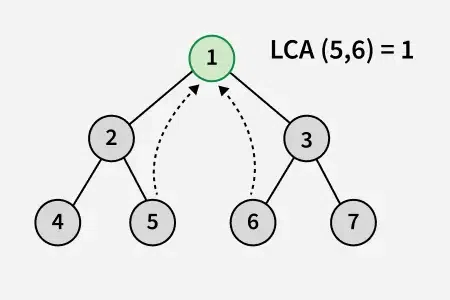

Lowest-Common-Ancestor-in-a-Binary-Tree-4
 
Path from root to 5 = 1 -> 2 -> 5
Path from root to 6 = 1 -> 3 -> 6

We start checking from 0th index. As both of the value matches, we move to the next index.
Now check for values at 1st index, there's a mismatch so we consider the previous value. 
Therefore the LCA of (5, 6) is 1

In [ ]:
# Python Program to find LCA

class Node:
    def __init__(self, k):
        self.data = k
        self.left = None
        self.right = None

# Function to find LCA of two datas.
def findLca(root, n1, n2):
    if not root:
        return None

    # If either data matches with root data, return root
    if root.data == n1 or root.data == n2:
        return root

    # Look for datas in left and right subtrees
    leftLca = findLca(root.left, n1, n2)
    rightLca = findLca(root.right, n1, n2)

    # If both of the above calls return Non-NULL, then one
    # data is present in one subtree and the other is present
    # in the other, so this node is the LCA
    if leftLca and rightLca:
        return root

    # Otherwise check if left subtree or right subtree is LCA
    return leftLca if leftLca else rightLca

# Returns true if key k is present in tree rooted with root
def checkIfPresent(root, k):
    # Base Case
    if root is None:
        return False

    # If data is present at root, or in left subtree or
    # right subtree, return true
    if (root.data == k or checkIfPresent(root.left, k) or 
            checkIfPresent(root.right, k)):
        return True

    # Else return false
    return False

# Function to check if keys are present
# in the tree and returns the lca.
def lca(root, n1, n2):
  
    # Return LCA only if both n1 and n2 are
    # present in tree
    if checkIfPresent(root, n1) and checkIfPresent(root, n2):
        return findLca(root, n1, n2)

    # Else return None
    return None

if __name__ == "__main__":
  
    # Construct the binary tree
    #             1
    #           /   \
    #          2     3
    #         / \   / \
    #        4   5 6   7 

    root = Node(1)
    root.left = Node(2)
    root.right = Node(3)
    root.left.left = Node(4)
    root.left.right = Node(5)
    root.right.left = Node(6)
    root.right.right = Node(7)

    ans = lca(root, 4, 5)
    if ans is None:
        print("No common ancestor found")
    else:
        print(ans.data)

Lowest Common Ancestor in a Binary Tree using Parent Pointer

In [4]:
# Python program to find lowest common ancestor using parent pointer

# A tree node 
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.parent = None


class BinaryTree:
    def __init__(self):
        self.root = None
        self.n1 = None
        self.n2 = None
        self.lca = None

    # A utility function to insert a new node with
    #   given key in Binary Search Tree
    def insert(self, node, key):
        # If the tree is empty, return a new node
        if node == None:
            return Node(key)

        # Otherwise, recur down the tree
        if key < node.key:
            node.left = self.insert(node.left, key)
            node.left.parent = node

        elif key > node.key:
            node.right = self.insert(node.right, key)
            node.right.parent = node

        # return the (unchanged) node pointer
        return node

    # A utility function to find depth of a node (distance of it from root)
    def depth(self, node):
        d = -1
        while(node != None):
            d += 1
            node = node.parent
        return d

    # To find LCA of nodes n1 and n2 in Binary Tree
    def LCA(self, n1, n2):
        # Find depths of two nodes and differences
        d1 = self.depth(n1)
        d2 = self.depth(n2)
        diff = d1-d2

        # If n2 is deeper, swap n1 and n2
        if diff < 0:
            temp = n1
            n1 = n2
            n2 = temp
            diff = -diff

        # Move n1 up until it reaches the same level as n2
        while diff != 0:
            n1 = n1.parent
            diff -= 1

        # Now n1 and n2 are at same levels
        while n1 != None and n2 != None:
            if (n1 == n2):
                return n1
            n1 = n1.parent
            n2 = n2.parent

        return None


# Driver method to test above functions
if __name__ == '__main__':
    tree = BinaryTree()
    tree.root = tree.insert(tree.root, 20)
    tree.root = tree.insert(tree.root, 8)
    tree.root = tree.insert(tree.root, 22)
    tree.root = tree.insert(tree.root, 4)
    tree.root = tree.insert(tree.root, 12)
    tree.root = tree.insert(tree.root, 10)
    tree.root = tree.insert(tree .root, 14)

    tree.n1 = tree.root.left.right.left
    tree.n2 = tree.root.right
    tree.lca = tree.LCA(tree.n1, tree.n2)

    print("LCA of " + str(tree.n1.key) + " and " +
          str(tree.n2.key) + " is " + str(tree .lca .key))

# This code is contributed by Tapesh(tapesh1308)

LCA of 10 and 22 is 20


Time Complexity : O(h)

Space Complexity : O(1)